In [2]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

total_data = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/data-preprocessing-project-tutorial/main/AB_NYC_2019.csv")
total_data.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [3]:
print(f"duplicated id's: {total_data['id'].duplicated().sum()}")

duplicated id's: 0


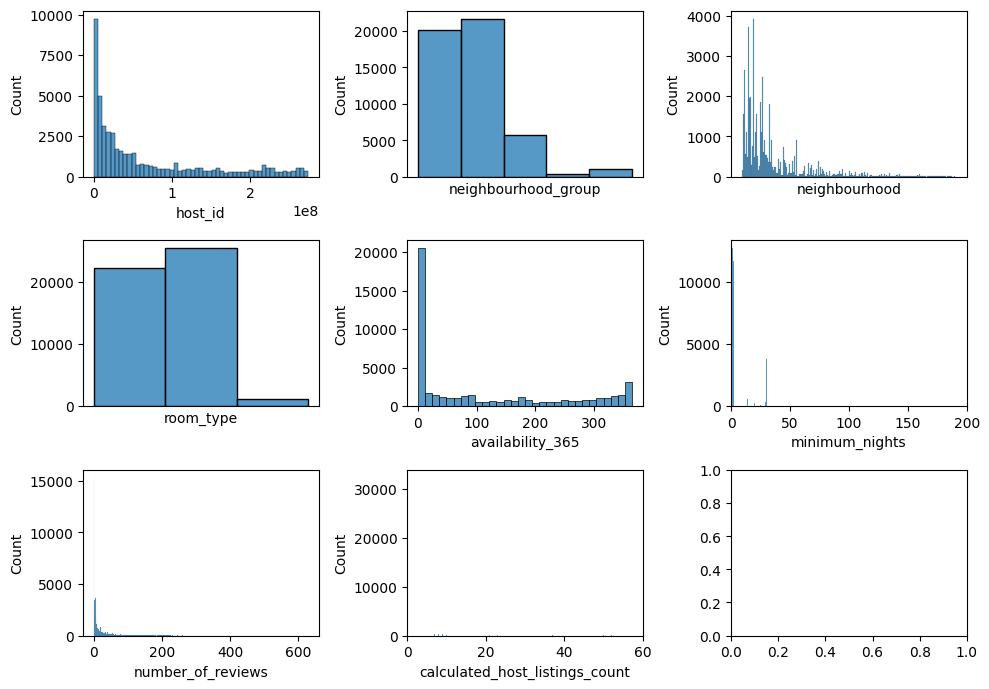

In [4]:
fig, axis = plt.subplots(3, 3, figsize=(10, 7))

sns.histplot(ax = axis[0,0], data = total_data, x = "host_id")
sns.histplot(ax = axis[0,1], data = total_data, x = "neighbourhood_group").set_xticks([])
sns.histplot(ax = axis[0,2], data = total_data, x = "neighbourhood").set_xticks([])
sns.histplot(ax = axis[1,0], data = total_data, x = "room_type").set_xticks([])
sns.histplot(ax = axis[1,1], data = total_data, x = "availability_365")
sns.histplot(ax = axis[1,2], data = total_data, x = "minimum_nights").set_xlim(0,200)
sns.histplot(ax = axis[2,0], data = total_data, x = "number_of_reviews")
sns.histplot(ax = axis[2,1], data = total_data, x = "calculated_host_listings_count").set_xlim(0,60)




plt.tight_layout()

plt.show()

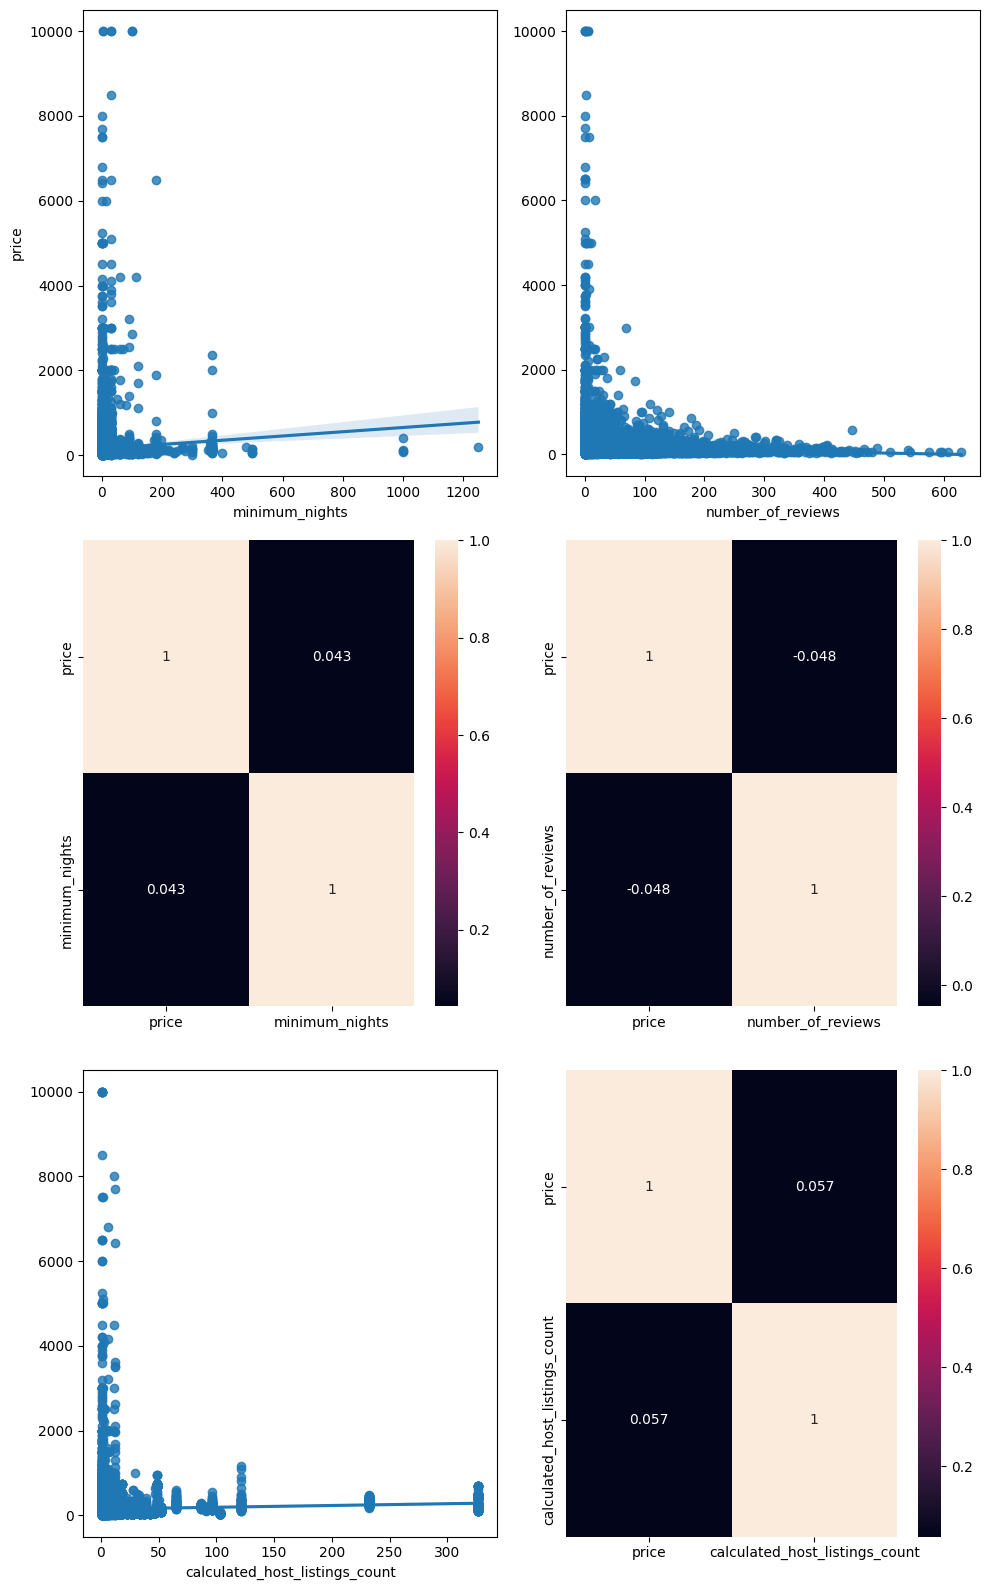

In [5]:
fig, axis = plt.subplots(3, 2, figsize = (10, 16))

sns.regplot(ax = axis[0, 0], data = total_data, x = "minimum_nights", y = "price")
sns.heatmap(total_data[["price", "minimum_nights"]].corr(), annot = True, ax = axis[1, 0])

sns.regplot(ax = axis[0, 1], data = total_data, x = "number_of_reviews", y = "price").set(ylabel = None)
sns.heatmap(total_data[["price", "number_of_reviews"]].corr(), annot = True, ax = axis[1, 1])

sns.regplot(ax = axis[2, 0], data = total_data, x = "calculated_host_listings_count", y = "price").set(ylabel = None)
sns.heatmap(total_data[["price", "calculated_host_listings_count"]].corr(), annot = True, ax = axis[2, 1]).set(ylabel = None)

plt.tight_layout()

plt.show()

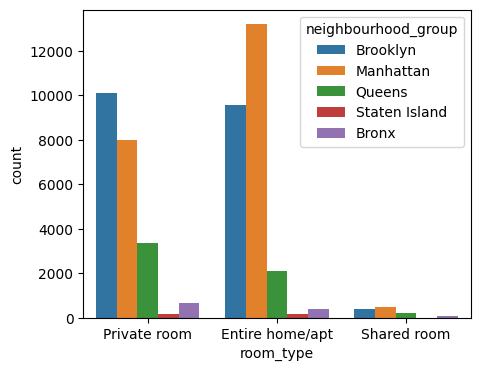

In [6]:
fig, axis = plt.subplots(figsize = (5, 4))

sns.countplot(data = total_data, x = "room_type", hue = "neighbourhood_group")

plt.show()


<Axes: >

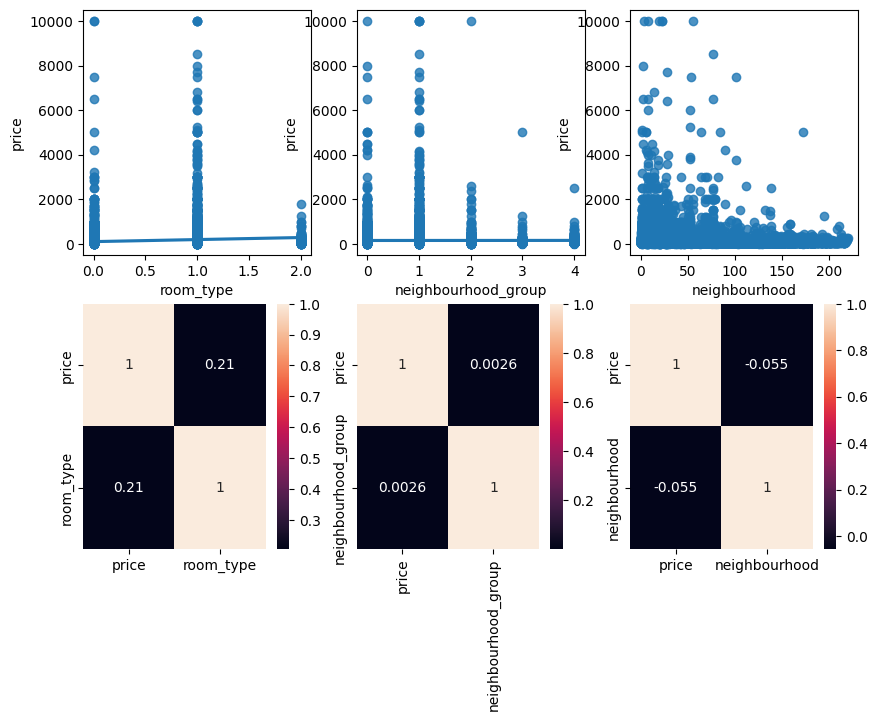

In [11]:
total_data["room_type"] = pd.factorize(total_data["room_type"])[0]
total_data["neighbourhood_group"] = pd.factorize(total_data["neighbourhood_group"])[0]
total_data["neighbourhood"] = pd.factorize(total_data["neighbourhood"])[0]

total_data = total_data[total_data["price"] > 0]

fig, axis = plt.subplots(2, 3, figsize=(10, 7))

sns.regplot(ax = axis[0, 0], data = total_data, x = "room_type", y = "price")
sns.heatmap(total_data[["price", "room_type"]].corr(), annot = True, ax = axis[1, 0])

sns.regplot(ax = axis[0, 1], data = total_data, x = "neighbourhood_group", y = "price")
sns.heatmap(total_data[["price", "neighbourhood_group"]].corr(), annot = True, ax = axis[1, 1])

sns.regplot(ax = axis[0, 2], data = total_data, x = "neighbourhood", y = "price")
sns.heatmap(total_data[["price", "neighbourhood"]].corr(), annot = True, ax = axis[1, 2])